<a href="https://colab.research.google.com/github/AkindeKadjo/House_pricing_prediction_Deep_Learning/blob/main/House_Pricing_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

[Data Source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

#Library Imports and Data Loading

In [ ]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
#Loading the data
Original_train = pd.read_csv('/content/drive/MyDrive/Coding Dojo/11 Week 11: Deep learning/train.csv')
Original_test = pd.read_csv('/content/drive/MyDrive/Coding Dojo/11 Week 11: Deep learning/test.csv')
# keeping a copy of the df as a safety net
df = Original_train.copy()
text = Original_test.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A quick check for the data info is done to have an overall idea of the loaded data set

In [ ]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Data Cleaning

In [ ]:
#checking for duplicate and deleting them
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
#check for missing values
df.isna().sum().sort_values().tail(20)

Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [ ]:
#I'll drop columns with higher than 10% missing values 
#(source:https://stackoverflow.com/questions/49791246/drop-columns-with-more-than-60-percent-of-empty-values-in-pandas)
null_percentage = df.isnull().sum()/df.shape[0]*100
col_to_drop = null_percentage[null_percentage>10].keys()
slim_df = df.drop(col_to_drop, axis=1)
#checking again
slim_df.isna().sum().sort_values().tail(20)

ExterQual        0
YearBuilt        0
Exterior2nd      0
Exterior1st      0
SalePrice        0
RoofStyle        0
RoofMatl         0
Electrical       1
MasVnrArea       8
MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtFinType2    38
BsmtExposure    38
GarageQual      81
GarageCond      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
dtype: int64

In [ ]:
#percentage of rows with missing data
((slim_df.isnull().any(axis=1).sum())/len(slim_df)*100).round(2)

8.36

These missing values are less than 10% of our data set, so they will be dropped.

In [ ]:
slim_df.dropna(inplace=True)
# final check for missing values
slim_df.isna().sum().sum()

0

In [ ]:
#Identifying and addressing any inconsistencies in categorical values
dtypes = slim_df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
    print(f"- Column= {col}")
    print(slim_df[col].value_counts(dropna=False))
    print('\n\n')

- Column= MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64



- Column= Street
Pave    1333
Grvl       5
Name: Street, dtype: int64



- Column= LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64



- Column= LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64



- Column= Utilities
AllPub    1337
NoSeWa       1
Name: Utilities, dtype: int64



- Column= LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64



- Column= LandSlope
Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64



- Column= Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWI

In [ ]:
#removing street and utilitites columns because they are pretty much uniform
slim_cut= slim_df.drop(columns=['Street','Utilities'])

In [ ]:
slim_cut.shape

(1338, 73)

In [ ]:
##Removing outliers with maximum std above 5

#selecting numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = slim_cut.select_dtypes(include=numerics)
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_numdf = pd.DataFrame(scaler.fit_transform(numdf), columns=numdf.columns)

#Removing outliers 
new_scaled_df = scaled_numdf[scaled_numdf  <= 5]  

#Reverting the scaling
newnum_df = pd.DataFrame(scaler.inverse_transform(scaled_numdf),columns = scaled_numdf.columns[0:])
newnum_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,1.960000e+02,706.0,-7.105427e-15,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,-1.421085e-14,978.0,-7.105427e-15,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,1.620000e+02,486.0,-7.105427e-15,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,-1.421085e-14,216.0,-7.105427e-15,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,3.500000e+02,655.0,-7.105427e-15,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [ ]:
newnum_df.shape

(1338, 37)

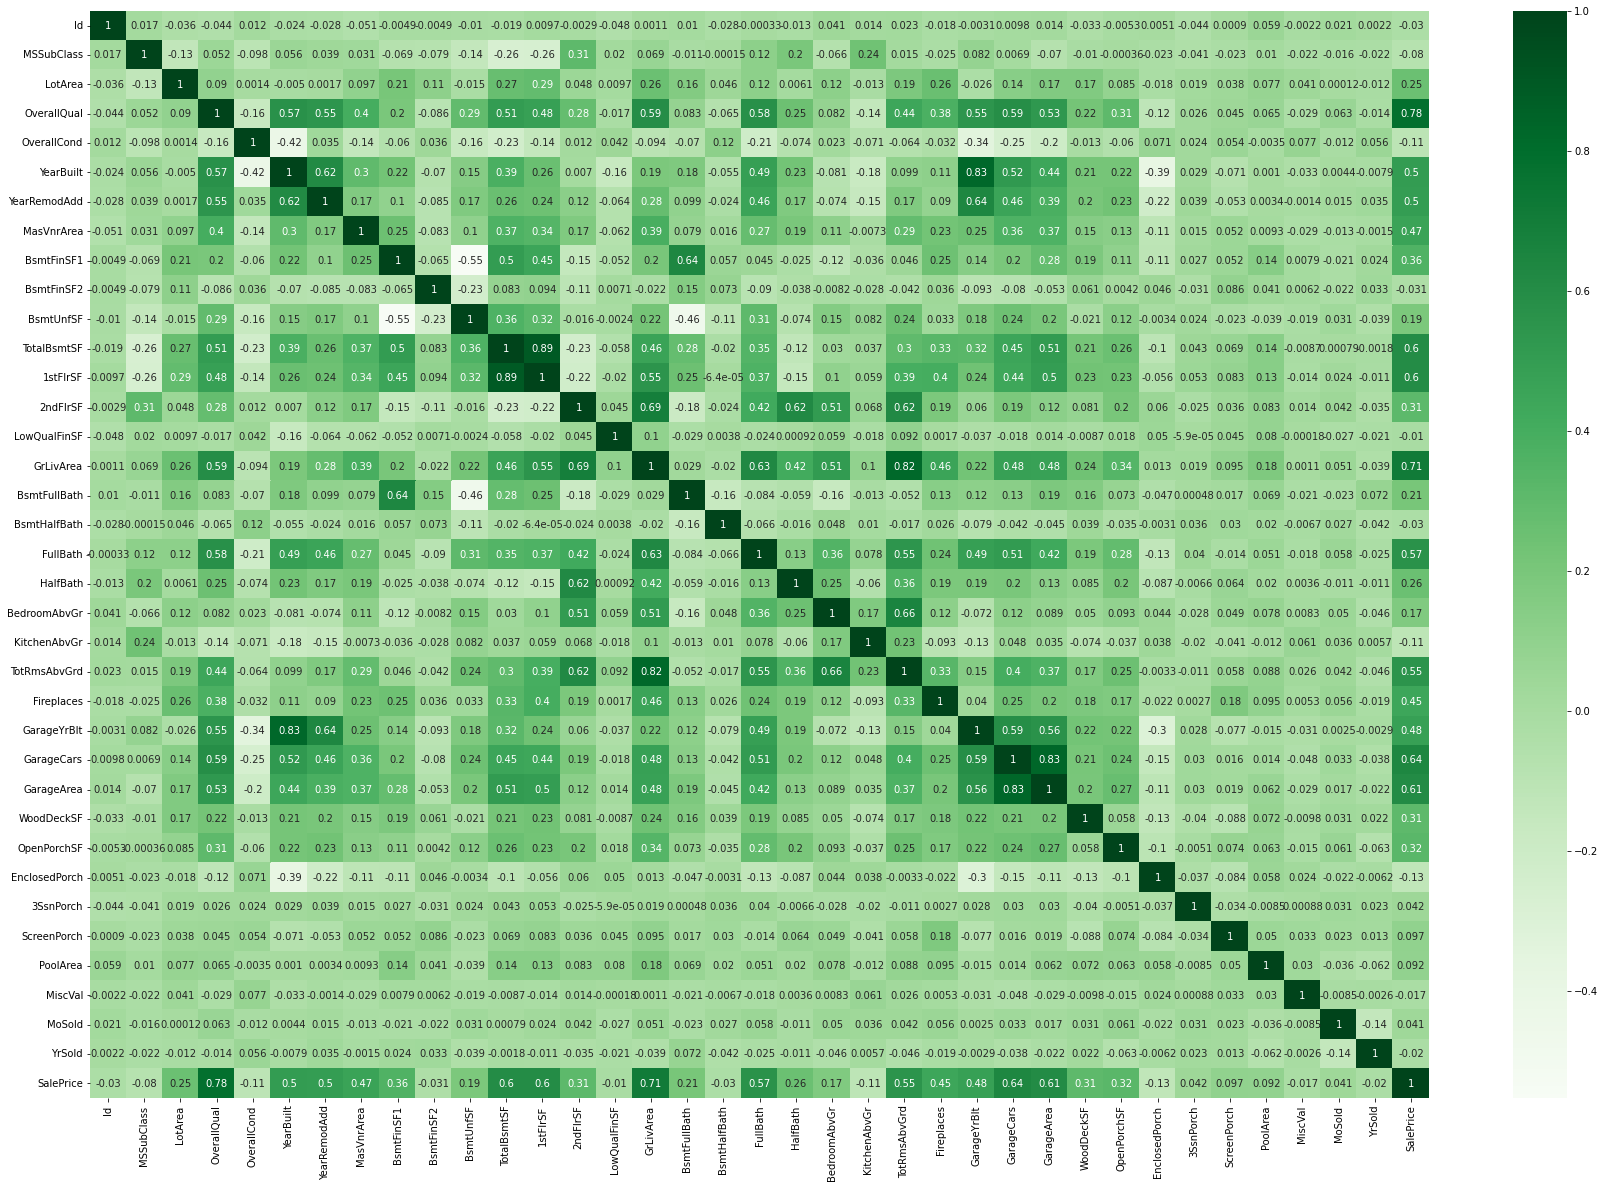

In [ ]:
corr = newnum_df.corr()
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(corr, cmap = 'Greens',annot =True);

In [ ]:
#selecting only columns whose correlation's absolute value is higher than 0.2 for SalePrice
threshold = 0.2
high_corr_df = newnum_df[[]] # df all the columns to keep
corr = newnum_df.corr()
for i in range(len(corr.columns)):
  if (abs(corr.iloc[i,(len(corr.columns)-1)]))>=threshold:
    coldf = (newnum_df.iloc[:,i]).to_frame() # getting each columns
    high_corr_df = pd.concat([high_corr_df ,coldf],axis = 1)
high_corr_df.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450.0,7.0,2003.0,2003.0,1.960000e+02,706.0,856.0,856.0,854.0,1710.0,...,2.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,208500.0
1,9600.0,6.0,1976.0,1976.0,-1.421085e-14,978.0,1262.0,1262.0,0.0,1262.0,...,2.0,0.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,181500.0
2,11250.0,7.0,2001.0,2002.0,1.620000e+02,486.0,920.0,920.0,866.0,1786.0,...,2.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,223500.0
3,9550.0,7.0,1915.0,1970.0,-1.421085e-14,216.0,756.0,961.0,756.0,1717.0,...,1.0,0.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,140000.0
4,14260.0,8.0,2000.0,2000.0,3.500000e+02,655.0,1145.0,1145.0,1053.0,2198.0,...,2.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,250000.0


In [ ]:
high_corr_df.shape

(1338, 21)

In [ ]:
#Concacenating non-numerical columns with high correlating columns
objdf = slim_cut.select_dtypes(include='object')
cleaned_df= pd.concat([objdf, high_corr_df],axis = 1)
#deleting missing values introduced by outlier removal
cleaned_df.dropna(inplace=True)
cleaned_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,2.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,208500.0
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,2.0,0.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,181500.0
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,2.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,223500.0
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,1.0,0.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,140000.0
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,2.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,250000.0


We went from 81 to 57 columns

#Sales Price Predictions with Deep Learning

##Prepocessing

In [ ]:
#setting Salesprice as a target column 
y = cleaned_df['SalePrice']
#setting X as the feature data, I'll include the rest of the columns
X = cleaned_df.drop(columns='SalePrice')
X.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,1.0,2.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0.0,2.0,0.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,1.0,2.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,1.0,1.0,0.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,1.0,2.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0


>Performing a train test split, here the random state of 42 is chosen for concistency

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#instantiating the StandardScaler,and OneHotEncoder 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Instantiating the make column transformer
preprocessor = make_column_transformer((scaler,make_column_selector(dtype_include='number')),
                                       (ohe,make_column_selector(dtype_include='object')), remainder='drop')
# Fitting the column transformer on the X_train
preprocessor.fit(X_train)

# Transforming the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [ ]:
X_train_proc.shape[1]

239

##Deep Learning models

In [ ]:
#creating a data frame output of the metrics
def res_regression(model,xtest,ytest,xtrain,ytrain, label='X Regression'):
  """Output regression metrics for both the test and the train data"""
 
  ## Get Predictions
  test_pred = model.predict(xtest)
  train_pred = model.predict(xtrain)
  ## Creating a header
  print('---'*20)
  print(f"[i] REPORT FOR: {label}")
  print('---'*20)
  #test metrics
  mse_test = mean_squared_error(ytest, test_pred)
  rmse_test = np.sqrt(mse_test).round(0)
  r2_test = r2_score(ytest, test_pred).round(4)
  res_df_test = pd.DataFrame([rmse_test,r2_test], columns=['Test data'],index=['RMSE','R2'])
  #train metrics
  mse_train = mean_squared_error(ytrain, train_pred)
  rmse_train = np.sqrt(mse_train).round(0)
  r2_train = r2_score(ytrain, train_pred).round(4)
  res_df_train = pd.DataFrame([rmse_train,r2_train],columns=['Training data'],index=['RMSE','R2'])
  res_df = pd.concat([res_df_test, res_df_train],axis = 1)
  return res_df

###model 1

29/29 [==============================] - 0s 2ms/step
------------------------------------------------------------
[i] REPORT FOR: Linear Regression
------------------------------------------------------------
       Test data  Training data
RMSE  45686.0000     33538.0000
R2        0.6325         0.8153


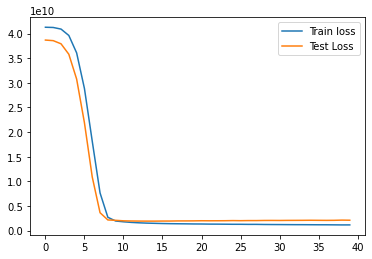

In [ ]:
# Save the number of features we have as our input shape
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=(X_train_proc.shape[1])))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = 'linear'))

#model.add(Dense(1, activation = 'linear'))
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# Fit our model
history = model.fit(X_train_proc, y_train, validation_data = (X_test_proc, y_test), 
                    epochs=40,verbose=0 )

# Evaluate the linear regression model and print
print(res_regression(model,X_test_proc,y_test, X_train_proc,y_train, label='Linear Regression'))
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

###model 2

29/29 [==============================] - 0s 1ms/step
------------------------------------------------------------
[i] REPORT FOR: Linear Regression
------------------------------------------------------------
       Test data  Training data
RMSE  43572.0000     38502.0000
R2        0.6657         0.7565


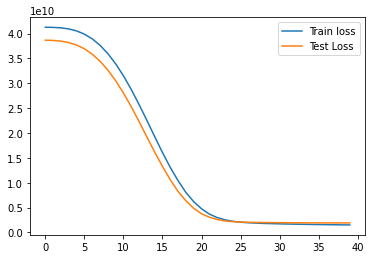

In [ ]:
#Tuning by reducing layers
# Save the number of features we have as our input shape
model = Sequential()
model.add(Dense(100, activation='linear', input_dim=(X_train_proc.shape[1])))
model.add(Dense(70, activation='relu'))
model.add(Dense(1))

#model.add(Dense(1, activation = 'linear'))
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# Fit our model
history = model.fit(X_train_proc, y_train, validation_data = (X_test_proc, y_test), 
                    epochs=40,verbose=0 )

# Evaluate the linear regression model and print
print(res_regression(model,X_test_proc,y_test, X_train_proc,y_train, label='Linear Regression'))
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

###model 3

29/29 [==============================] - 0s 2ms/step
------------------------------------------------------------
[i] REPORT FOR: Linear Regression
------------------------------------------------------------
       Test data  Training data
RMSE  43541.0000      38545.000
R2        0.6662          0.756


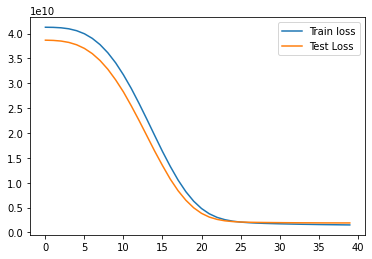

In [ ]:
#Tuning with early stopping and l1l2 regularization
# Save the number of features we have as our input shape
model = Sequential()
model.add(Dense(100, activation='linear', input_dim=(X_train_proc.shape[1])))
model.add(Dense(70, activation='relu'))
model.add(Dense(1))

layer = layers.Dense(
    units=3,
    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.L2(1e-4),
    activity_regularizer=regularizers.L2(1e-5)
)
#model.add(Dense(1, activation = 'linear'))
# Compile
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(patience = 2)
# Fit our model
history = model.fit(X_train_proc, y_train, validation_data = (X_test_proc, y_test), 
                    epochs=40,verbose=0,callbacks = [early_stopping] )

# Evaluate the linear regression model and print
print(res_regression(model,X_test_proc,y_test, X_train_proc,y_train, label='Linear Regression'))
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

The best model is #3 with the highest R^2 for the test data and lowest RMSE.

Successful housing price prediction was achieved within 43k.